# Capstone

In [21]:
# importing all my dependancies
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import string
import re
from sklearn.metrics import ConfusionMatrixDisplay

In [22]:
corpus = pd.read_csv('data/labeled_newscatcher_dataset.csv', sep=";")
corpus.shape

(108774, 6)

In [23]:
corpus.head()

,topic,link,domain,published_date,title,lang
0,SCIENCE,https://www.eurekalert.org/pub_releases/2020-0...,eurekalert.org,2020-08-06 13:59:45,A closer look at water-splitting's solar fuel ...,en
1,SCIENCE,https://www.pulse.ng/news/world/an-irresistibl...,pulse.ng,2020-08-12 15:14:19,"An irresistible scent makes locusts swarm, stu...",en
2,SCIENCE,https://www.express.co.uk/news/science/1322607...,express.co.uk,2020-08-13 21:01:00,Artificial intelligence warning: AI will know ...,en
3,SCIENCE,https://www.ndtv.com/world-news/glaciers-could...,ndtv.com,2020-08-03 22:18:26,Glaciers Could Have Sculpted Mars Valleys: Study,en
4,SCIENCE,https://www.thesun.ie/tech/5742187/perseid-met...,thesun.ie,2020-08-12 19:54:36,Perseid meteor shower 2020: What time and how ...,en


In [24]:
# checking for nulls
corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108774 entries, 0 to 108773
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   topic           108774 non-null  object
 1   link            108774 non-null  object
 2   domain          108774 non-null  object
 3   published_date  108774 non-null  object
 4   title           108774 non-null  object
 5   lang            108774 non-null  object
dtypes: object(6)
memory usage: 5.0+ MB


In [25]:
# As we can see here, the Science topic has only a third of the news stories compared to the other topics
# The class imbalance could cause an issue later 
corpus['topic'].value_counts()

HEALTH           15000
BUSINESS         15000
TECHNOLOGY       15000
NATION           15000
SPORTS           15000
ENTERTAINMENT    15000
WORLD            15000
SCIENCE           3774
Name: topic, dtype: int64

In [26]:
# checking the language of all the data (although not always accurate)
corpus['lang'].value_counts()

en    108774
Name: lang, dtype: int64

In [27]:
# checking out the titles
corpus.loc[100].title

'Insect can escape after being eaten by frog, scientists find'

## Data Cleaning and EDA 

In [28]:
# # creating my stopword list and a word net for my lemmatizer


# def get_wordnet_pos(words):
#     if words.startswith('J'):
#         return wordnet.ADJ
#     elif words.startswith('V'):
#         return wordnet.VERB
#     elif words.startswith('N'):
#         return wordnet.NOUN
#     elif words.startswith('R'):
#         return wordnet.ADV
#     else:
#         return wordnet.NOUN

# corpus.title = pos_tag(corpus.title)  
# corpus.title = [(word[0], get_wordnet_pos(word[1])) for word in corpus.title]

In [29]:
# cleaning my test data
sw = stopwords.words('english')

corpus.title = [word.lower() for word in corpus.title]
corpus.title = [word for word in corpus.title if word not in sw]
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
corpus.title = [nltk.regexp_tokenize(line, pattern) for line in corpus.title]

In [31]:
from textblob import TextBlob, Word
from wordcloud import WordCloud

In [32]:
tech_corp = corpus.loc[corpus['topic'] == 'TECHNOLOGY']
health_corp = corpus.loc[corpus['topic'] == 'HEALTH']
world_corp = corpus.loc[corpus['topic'] == 'WORLD']
entertain_corp = corpus.loc[corpus['topic'] == 'ENTERTAINMENT']
sports_corp = corpus.loc[corpus['topic'] == 'SPORTS']
business_corp = corpus.loc[corpus['topic'] == 'BUSINESS']
nation_corp = corpus.loc[corpus['topic'] == 'NATION']
science_corp = corpus.loc[corpus['topic'] == 'SCIENCE']

In [33]:
tech_corp.head()

,topic,link,domain,published_date,title,lang
42,TECHNOLOGY,https://www.kotaku.com.au/2020/08/come-see-wha...,kotaku.com.au,2020-08-14 06:29:00,"[come, see, what, it, s, like, to, play, micro...",en
43,TECHNOLOGY,https://www.notebookcheck.net/Xiaomi-rolls-out...,notebookcheck.net,2020-08-11 16:17:38,"[xiaomi, rolls, out, android, to, the, redmi, ...",en
44,TECHNOLOGY,https://sea.mashable.com/tech/11935/xiaomis-mi...,sea.mashable.com,2020-08-12 14:28:00,"[xiaomi's, mi, ultra, has, x, zoom, and, can, ...",en
45,TECHNOLOGY,https://www.welivesecurity.com/2020/08/14/goog...,welivesecurity.com,2020-08-14 15:12:04,"[google, will, test, new, feature, in, chrome,...",en
46,TECHNOLOGY,https://www.digitaltrends.com/news/tiktok-crea...,digitaltrends.com,2020-08-12 19:12:00,"[tiktok, creators, say, they, re, not, switchi...",en


In [36]:
tech_list = []
health_list = []
world_list = []
entertain_list = []
sports_list = []
business_list = []
nation_list = []
science_list = []  

for x in tech_corp['title']:  # loop over lists in df
    tech_list += x  # append elements of lists to full list

for x in health_corp['title']:  # loop over lists in df
    health_list += x  # append elements of lists to full list

for x in world_corp['title']:  # loop over lists in df
    world_list += x  # append elements of lists to full list

for x in entertain_corp['title']:  # loop over lists in df
    entertain_list += x  # append elements of lists to full list

for x in sports_corp['title']:  # loop over lists in df
    sports_list += x  # append elements of lists to full list

for x in business_corp['title']:  # loop over lists in df
    business_list += x  # append elements of lists to full list

for x in nation_corp['title']:  # loop over lists in df
    nation_list += x  # append elements of lists to full list

for x in science_corp['title']:  # loop over lists in df
    science_list += x  # append elements of lists to full list

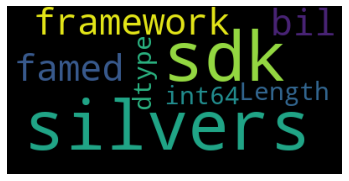

<Figure size 1440x720 with 0 Axes>

In [41]:
tech_counts = pd.Series(tech_list).value_counts()

wordcloud = WordCloud(max_words=100, width=400, height=200).generate(str(tech_counts))
plt.imshow(wordcloud)
plt.axis('off')
plt.figure(figsize=(20,10))
plt.show()

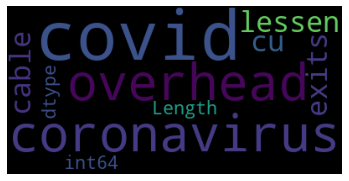

<Figure size 1440x720 with 0 Axes>

In [40]:
health_counts = pd.Series(health_list).value_counts()

wordcloud = WordCloud(max_words=100, width=400, height=200).generate(str(health_counts))
plt.imshow(wordcloud)
plt.axis('off')
plt.figure(figsize=(20,10))
plt.show()

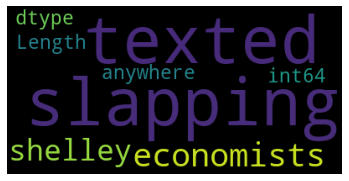

<Figure size 1440x720 with 0 Axes>

In [39]:
world_counts = pd.Series(world_list).value_counts()

wordcloud = WordCloud(max_words=100, width=400, height=200).generate(str(world_counts))
plt.imshow(wordcloud)
plt.axis('off')
plt.figure(figsize=(20,10))
plt.show()

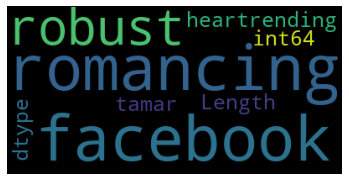

<Figure size 1440x720 with 0 Axes>

In [42]:
entertain_counts = pd.Series(entertain_list).value_counts()

wordcloud = WordCloud(max_words=100, width=400, height=200).generate(str(entertain_counts))
plt.imshow(wordcloud)
plt.axis('off')
plt.figure(figsize=(20,10))
plt.show()

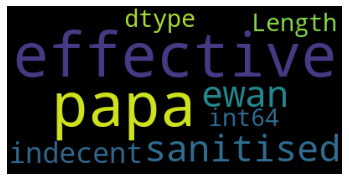

<Figure size 1440x720 with 0 Axes>

In [43]:
sports_counts = pd.Series(sports_list).value_counts()

wordcloud = WordCloud(max_words=100, width=400, height=200).generate(str(sports_counts))
plt.imshow(wordcloud)
plt.axis('off')
plt.figure(figsize=(20,10))
plt.show()

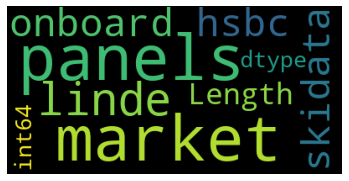

<Figure size 1440x720 with 0 Axes>

In [44]:
business_counts = pd.Series(business_list).value_counts()

wordcloud = WordCloud(max_words=100, width=400, height=200).generate(str(business_counts))
plt.imshow(wordcloud)
plt.axis('off')
plt.figure(figsize=(20,10))
plt.show()

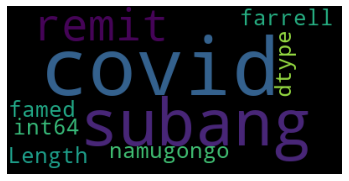

<Figure size 1440x720 with 0 Axes>

In [45]:
nation_counts = pd.Series(nation_list).value_counts()

wordcloud = WordCloud(max_words=100, width=400, height=200).generate(str(nation_counts))
plt.imshow(wordcloud)
plt.axis('off')
plt.figure(figsize=(20,10))
plt.show()

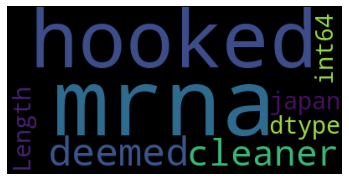

<Figure size 1440x720 with 0 Axes>

In [46]:
science_counts = pd.Series(science_list).value_counts()

wordcloud = WordCloud(max_words=100, width=400, height=200).generate(str(science_counts))
plt.imshow(wordcloud)
plt.axis('off')
plt.figure(figsize=(20,10))
plt.show()

## Vectorization and Modeling

In [47]:
X = corpus.title
y = corpus.topic

In [48]:
# performing a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=549841, test_size=0.35)

In [56]:
X.dtypes

dtype('O')

### CountVectorizer

In [50]:
# starting off with a Count Vec and also removing stopwords from the list here just in case
cv = CountVectorizer(stop_words= sw, lowercase=False)

train_vec = cv.fit_transform(X_train)
train_vec = pd.DataFrame.sparse.from_spmatrix(train_vec)
train_vec.columns = sorted(cv.vocabulary_)
train_vec.set_index(y_train.index, inplace=True)

TypeError: expected string or bytes-like object

In [ ]:
# there seems to be some non-english words still included in the list
train_vec

,00,000,000cr,000ft,000m,000mah,000x,001,004,004s,...,éire,éireann,équipe,óg,ørsted,česko,čeština,ōtaki,ōtāhuhu,žilina
62795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13310,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27804,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58029,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97729,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29386,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94879,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_vec = cv.transform(X_test)
test_vec  = pd.DataFrame.sparse.from_spmatrix(test_vec)
test_vec.columns = sorted(cv.vocabulary_)
test_vec.set_index(y_test.index, inplace=True)

In [ ]:
# using bayes for this equation
mnb = MultinomialNB()

mnb.fit(train_vec, y_train)

MultinomialNB()

In [ ]:
y_hat = mnb.predict(test_vec)
accuracy_score(y_test, y_hat)

0.7919413726983794

### TF-IDF Vectorizer

In [52]:
tfidf = TfidfVectorizer(stop_words= sw)
train_vec2 = tfidf.fit_transform(X_train)
train_vec2  = pd.DataFrame.sparse.from_spmatrix(train_vec2)
train_vec2.columns = sorted(tfidf.vocabulary_)
train_vec2.set_index(y_train.index, inplace=True)

AttributeError: 'list' object has no attribute 'lower'

In [ ]:
test_vec2 = tfidf.transform(X_test)
test_vec2  = pd.DataFrame.sparse.from_spmatrix(test_vec2)
test_vec2.columns = sorted(tfidf.vocabulary_)
test_vec2.set_index(y_test.index, inplace=True)

In [ ]:
mnb2 = MultinomialNB()

mnb2.fit(train_vec2, y_train)
y_hat2 = mnb2.predict(test_vec2)

In [ ]:
accuracy_score(y_test, y_hat2)

0.7881326994300123

### Word2Vec

In [ ]:
from gensim.models import Word2Vec
from gensim.test.utils import common_texts


w2v_model = Word2Vec(sentences=common_texts,
                    vector_size=100, window=5, min_count=2)

In [ ]:
w2v_model.train(X_train, epochs=30, total_examples= w2v_model.corpus_count)

(0, 152376750)

In [ ]:
w2v_model.